In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:04<00:00, 42.1MB/s]
100% 163M/163M [00:04<00:00, 36.7MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/face-mask-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Using Generators
gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.3, zoom_range = 0.3,
                              horizontal_flip=True,validation_split = 0.2)

train_data = gen_train.flow_from_directory("/content/data",
                                           target_size = (256, 256), batch_size = 32, class_mode="categorical",subset = "training")



val_data = gen_train.flow_from_directory("/content/data",
                                           target_size = (256, 256), batch_size = 32, class_mode="categorical",subset = "validation")

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
conv_base = VGG16(weights = 'imagenet',include_top = False,input_shape = (256,256,3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(124,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [ ]:
conv_base.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 124)               4063356   
                                                                 
 dense_1 (Dense)             (None, 2)                 250       
                                                                 
Total params: 18778294 (71.63 MB)
Trainable params: 4063606 (15.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

In [ ]:
res = model.fit(train_data,epochs = 6,steps_per_epoch=len(train_data),validation_data=val_data)

Epoch 1/10
 74/189 [==========>...................] - ETA: 1:10 - loss: 0.3212 - accuracy: 0.9010

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 [==============================] - 153s 752ms/step - loss: 0.2221 - accuracy: 0.9242 - val_loss: 0.1659 - val_accuracy: 0.9417
Epoch 2/10
189/189 [==============================] - 134s 711ms/step - loss: 0.0743 - accuracy: 0.9747 - val_loss: 0.1062 - val_accuracy: 0.9629
Epoch 3/10
189/189 [==============================] - 136s 718ms/step - loss: 0.0655 - accuracy: 0.9753 - val_loss: 0.1643 - val_accuracy: 0.9589
Epoch 4/10
189/189 [==============================] - 138s 732ms/step - loss: 0.0938 - accuracy: 0.9656 - val_loss: 0.1201 - val_accuracy: 0.9589
Epoch 5/10
189/189 [==============================] - 135s 711ms/step - loss: 0.0497 - accuracy: 0.9818 - val_loss: 0.1175 - val_accuracy: 0.9596
Epoch 6/10
189/189 [==============================] - 136s 719ms/step - loss: 0.0405 - accuracy: 0.9854 - val_loss: 0.1099 - val_accuracy: 0.9695
Epoch 7/10
189/189 [==============================] - 139s 734ms/step - loss: 0.0621 - accuracy: 0.9780 - val_loss: 0.1438 - val_accura

In [ ]:
from keras.models import load_model
model.save("network.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = load_model("network.h5")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from tensorflow.keras.preprocessing import image
output_class = ["with mask", "without mask"]
def mask_prediction(new_image):
  t_img = image.load_img(new_image, target_size = (256,256))
  plt.axis("off")
  plt.imshow(t_img)
  plt.show()

  t_img = image.img_to_array(t_img)/255
  t_img = np.expand_dims(t_img, axis=0)

  predicted_array = my_model.predict(t_img)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("The person in pictures is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

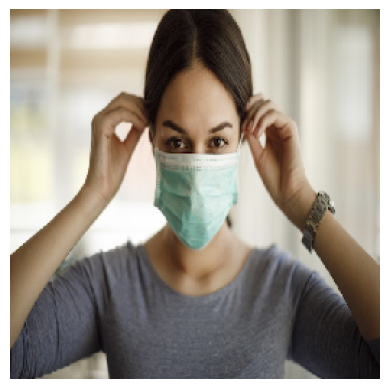

1/1 [==============================] - 8s 8s/step
The person in pictures is  with mask  with  100.0  % accuracy


In [ ]:
mask_prediction("/content/mask_myths_600.jpg")

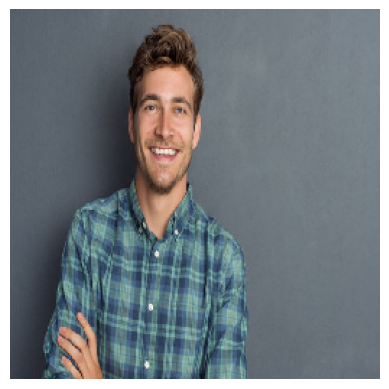

1/1 [==============================] - 0s 20ms/step
The person in pictures is  without mask  with  94.0  % accuracy


In [ ]:
mask_prediction("/content/without_mask.jpg")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -r '/content/network.h5' /content/gdrive/MyDrive/something/


In [ ]:
from keras.models import load_model
my_model = load_model("/content/gdrive/MyDrive/something/network.h5")

In [ ]:
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from google.colab.patches import cv2_imshow

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
model = load_model("/content/gdrive/MyDrive/something/network.h5")


In [ ]:
def face_mask_detector(frame):
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.1,
                                        minNeighbors=5,
                                        minSize=(60, 60),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
  faces_list=[]
  preds=[]
  for (x, y, w, h) in faces:
      face_frame = frame[y:y+h,x:x+w]
      face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
      face_frame = cv2.resize(face_frame, (256, 256))
      face_frame = img_to_array(face_frame)
      face_frame = np.expand_dims(face_frame, axis=0)
      face_frame =  preprocess_input(face_frame)
      faces_list.append(face_frame)
      if len(faces_list)>0:
          preds = model.predict(faces_list)
      for pred in preds:
          (mask, withoutMask) = pred
      label = "Mask" if mask > withoutMask else "No Mask"
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv2.putText(frame, label, (x, y- 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

      cv2.rectangle(frame, (x, y), (x + w, y + h),color, 3)

  return frame

In [ ]:
input_image = cv2.imread("/content/data/with_mask/with_mask_10.jpg")

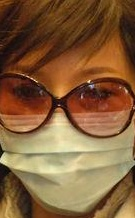

In [ ]:

output = face_mask_detector(input_image)
cv2_imshow(output)